# Library Installations and Imports

In [1]:
#library installations
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [2]:
import gdown
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, make_scorer, roc_curve, auc, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path_training = '/content/drive/MyDrive/Projects/Predicting_Introverts_Extroverts/Intro_Extro_train.csv'
file_path_testing = '/content/drive/MyDrive/Projects/Predicting_Introverts_Extroverts/Intro_Extro_test.csv'

# Exploratory Data Analysis

In [5]:
training_data = pd.read_csv(file_path_training)

In [6]:
training_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [7]:
training_data = training_data.iloc[:,1:]
training_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [8]:
# summary of numerical attributes
training_data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [9]:
print(training_data.isna().sum(),'\n')
print(training_data.isnull().sum())

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64 

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [10]:
# more useful when target variable is numeric
corr_matrix = training_data.corr(numeric_only=True)
corr_matrix

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


# Feature Engineering

In [11]:
# Dividing the training data into independent and dependent features
X_train = training_data.iloc[:,:-1]

In [12]:
X_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.0
1,1.0,No,7.0,3.0,No,10.0,8.0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0
4,1.0,No,4.0,4.0,No,13.0,NaN


In [13]:
y_train = training_data.iloc[:,-1]

In [14]:
y_train.head()

,Personality
0,Extrovert
1,Extrovert
2,Introvert
3,Extrovert
4,Extrovert


In [15]:
numeric_features = training_data.select_dtypes(include=['number']).columns.tolist()
numeric_features

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [16]:
categorical_features = training_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Stage_fear', 'Drained_after_socializing', 'Personality']

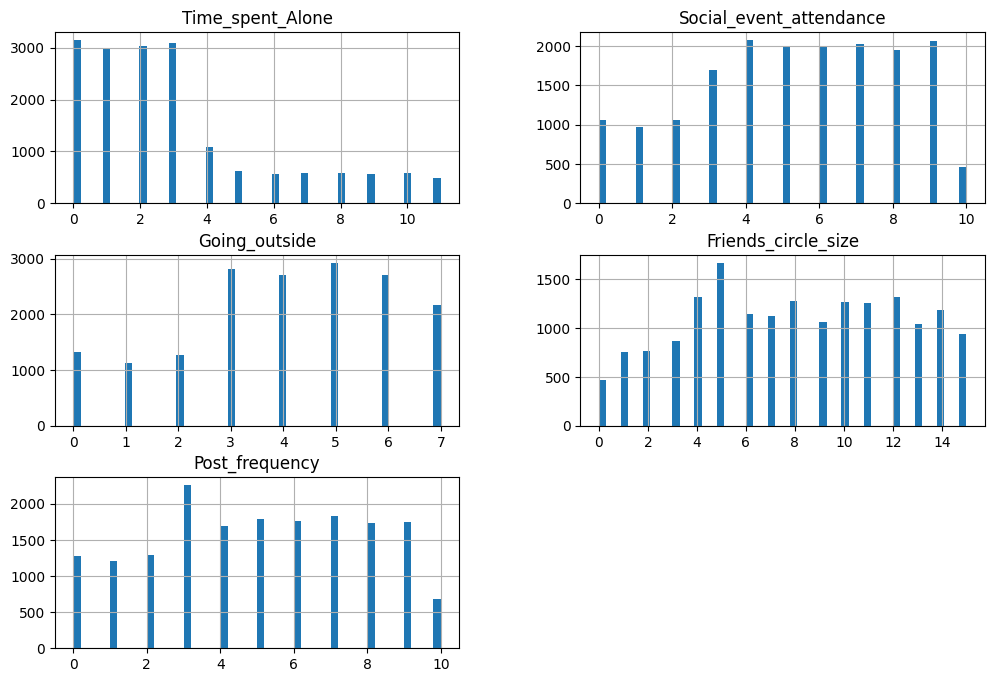

In [17]:
training_data[numeric_features].hist(bins=50, figsize=(12, 8))
plt.show()

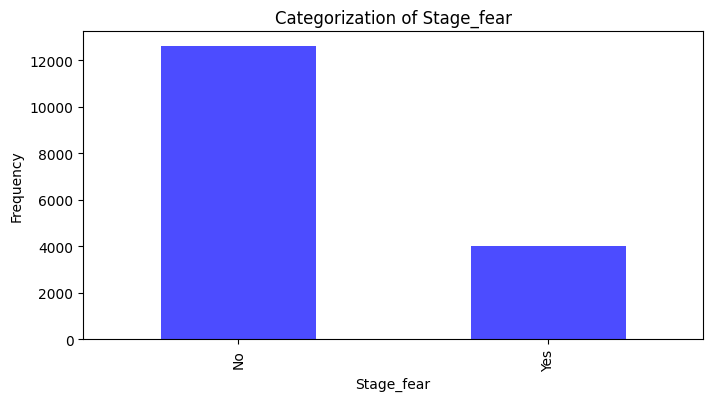

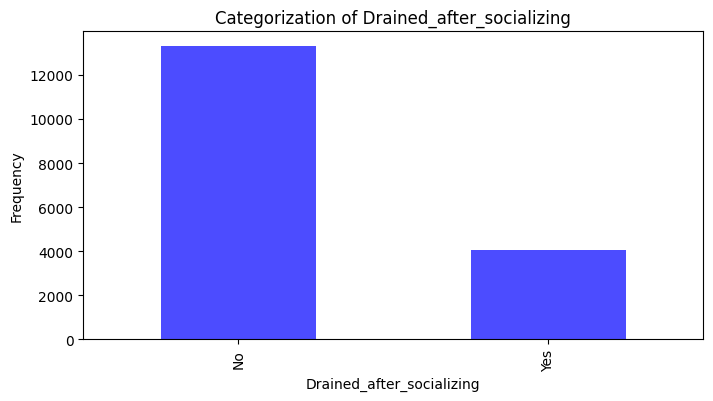

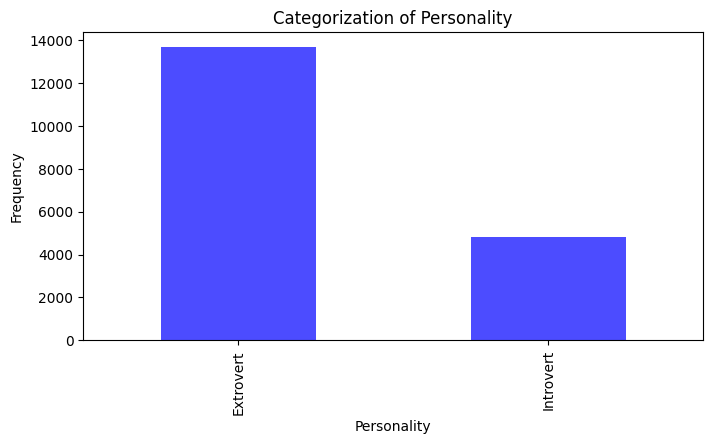

In [18]:
for categorical_feature in categorical_features:
  plt.figure(figsize=(8, 4))
  training_data[categorical_feature].value_counts().plot(kind='bar', color='blue', alpha=0.7)
  plt.title(f'Categorization of {categorical_feature}')
  plt.xlabel(categorical_feature)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
# Models to train - Logistic Regression, Random Forest, XGBoost, SVM

# Pre-Processing

In [19]:
# Preprocessing steps
numeric_full = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_no_scaling = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_encoded = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Column transformers

numeric_features_present = [col for col in numeric_features if col in X_train.columns]
categorical_features_present = [col for col in categorical_features if col in X_train.columns]

full_preprocessor = ColumnTransformer([
    ('num', numeric_full, numeric_features_present),
    ('cat', categorical_encoded, categorical_features_present)
])

no_scaling_preprocessor = ColumnTransformer([
    ('num', numeric_no_scaling, numeric_features_present),
    ('cat', categorical_encoded, categorical_features_present)
])


# Model Selection - Logistic, Random Forest and SVM

In [21]:
# 4. Define model + pipeline combinations
model_pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', full_preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),

    'SVM': Pipeline([
        ('preprocessor', full_preprocessor),
        ('classifier', SVC(probability=True))
    ]),

    'Random Forest': Pipeline([
        ('preprocessor', no_scaling_preprocessor),
        ('classifier', RandomForestClassifier())
    ])
}

In [22]:
# 5. Define param grids (customize as needed)
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None]
    }
}

In [23]:
X_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.0
1,1.0,No,7.0,3.0,No,10.0,8.0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0
4,1.0,No,4.0,4.0,No,13.0,NaN


In [ ]:
y_train.head()

,Personality
0,Extrovert
1,Extrovert
2,Introvert
3,Extrovert
4,Extrovert


In [24]:
y_train.unique()

array(['Extrovert', 'Introvert'], dtype=object)

# Hyperparameter Optimization

In [25]:
def train_and_select_model(name, pipeline, param_grid, X_train, y_train, scoring):
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1,
    verbose=1
    )
    grid.fit(X_train, y_train)

    print(f"\n{name}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Accuracy: {grid.best_score_:.4f}")
    print(f"Precision: {grid.cv_results_['mean_test_precision'][grid.best_index_]:.4f}")
    print(f"Recall: {grid.cv_results_['mean_test_recall'][grid.best_index_]:.4f}")

    return grid.best_estimator_

# Model Evaluation

In [26]:
trained_models = {}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted')
}

for name, pipeline in model_pipelines.items():
    best_model = train_and_select_model(name, pipeline, param_grids[name], X_train, y_train, scoring)
    trained_models[name] = best_model

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Logistic Regression
Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Accuracy: 0.9687
Precision: 0.9686
Recall: 0.9687
Fitting 3 folds for each of 6 candidates, totalling 18 fits

SVM
Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'rbf'}
Accuracy: 0.9689
Precision: 0.9688
Recall: 0.9689
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Random Forest
Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Accuracy: 0.9684
Precision: 0.9683
Recall: 0.9684


In [27]:
testing_data = pd.read_csv(file_path_testing)

In [28]:
testing_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [29]:
X_test = testing_data.iloc[:,1:]

In [30]:
X_test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [31]:
# Prediction using Logistic Regression
y_pred = trained_models['Logistic Regression'].predict(X_test)

In [32]:
y_pred

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [33]:
ids = testing_data['id']

prediction_results = pd.DataFrame({
        'id': ids,
        'loan_status': y_pred
    })

prediction_results.to_csv('Predictions_Introvert_Extrovert.csv', index=False)

In [34]:
y_pred_Logistic_prob = trained_models['Logistic Regression'].predict_proba(X_test)

In [35]:
y_pred_Logistic_prob

array([[0.94709559, 0.05290441],
       [0.05586005, 0.94413995],
       [0.98826616, 0.01173384],
       ...,
       [0.95204417, 0.04795583],
       [0.97019894, 0.02980106],
       [0.0473207 , 0.9526793 ]])

In [36]:
Logistic_df = pd.DataFrame(y_pred_Logistic_prob, columns=["Class Extrovert", "Class Introvert"])

In [37]:
Logistic_predictions_Probabilities = pd.concat([prediction_results,Logistic_df], axis=1)

Logistic_predictions_Probabilities.to_csv("Logistic_predictions_Probabilities.csv", index=False)

# Ensemble Model - Voting Classifier

In [38]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', trained_models['Logistic Regression']),
        ('rf', trained_models['Random Forest']),
        ('svm', trained_models['SVM'])
    ],
    voting='soft'
)

In [39]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Time_spent_Alone',
                                                                                 'Social_event_attendance',
                                                                                 'Going_outside',
                                                                                 'Friends_circle_size',
                                                                                 'Post_frequency']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(st...
                                                                                                 StandardScaler())]),
                                                                                ['Time_spent_Alone',
                                                                                 'Social_event_attendance',
                                                                                 'Going_outside',
                                                                                 'Friends_circle_size',
                                                                                 'Post_frequency']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['Stage_fear',
                                                                                 'Drained_after_socializing'])])),
                                              ('classifier',
                                               SVC(C=0.1,
                                                   probability=True))]))],
                 voting='soft')

In [40]:
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)

In [41]:
y_proba

array([[0.97325123, 0.02674877],
       [0.05315604, 0.94684396],
       [0.97080634, 0.02919366],
       ...,
       [0.97421518, 0.02578482],
       [0.97983325, 0.02016675],
       [0.0425068 , 0.9574932 ]])

In [42]:
ids = testing_data['id']

prediction_results = pd.DataFrame({
        'id': ids,
        'loan_status': y_pred
    })

prediction_results.to_csv('Predictions_Ensemble.csv', index=False)

In [43]:
y_pred

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

# XGBoost

In [ ]:
### XGBoost model

In [44]:
le = LabelEncoder()

In [45]:
y_train_encoded = le.fit_transform(y_train)

In [46]:
y_train_encoded

array([0, 0, 1, ..., 1, 1, 0])

In [47]:
X_train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.0
1,1.0,No,7.0,3.0,No,10.0,8.0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0
4,1.0,No,4.0,4.0,No,13.0,NaN
...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0
18520,1.0,NaN,6.0,7.0,No,6.0,5.0
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0


In [48]:
combined_df = pd.concat([X_train, X_test], axis=0)
cat_cols = combined_df.select_dtypes(include="object").columns.tolist()

encoder = OrdinalEncoder()
combined_df[cat_cols] = encoder.fit_transform(combined_df[cat_cols])

X_train_XG = combined_df.iloc[:len(X_train)].reset_index(drop=True)
X_test_XG = combined_df.iloc[len(X_train):].reset_index(drop=True)

In [49]:
X_train_XG.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN


In [50]:
X_test_XG.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,9.0,1.0,1.0,2.0,1.0,1.0,1.0


In [51]:
param_grid_XG = {
    'max_depth': [3,4, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0],
    "colsample_bytree": [0.8],
    'n_estimators': [100],
    "eta": [0.1]
}

In [52]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [53]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [54]:
grid_search_XG = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_XG,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [55]:
grid_search_XG.fit(X_train_XG, y_train_encoded)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'eta': [0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [100], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [56]:
y_pred_XG = grid_search_XG.predict(X_test_XG)

In [57]:
y_pred_XG

array([0, 1, 0, ..., 0, 0, 1])

In [58]:
submission_file_path = '/content/drive/MyDrive/Projects/Predicting_Introverts_Extroverts/Submissions_Introvert_Extrovert.csv'

In [59]:
submission_data = pd.read_csv(submission_file_path)

In [60]:
submission_data["Personality"] = le.inverse_transform(y_pred_XG)
submission_data.to_csv("XGBoost_predictions.csv", index=False)

In [61]:
submission_data.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [62]:
y_proba_XG = grid_search_XG.predict_proba(X_test_XG)

In [63]:
y_proba_XG

array([[0.9926358 , 0.00736424],
       [0.02763969, 0.9723603 ],
       [0.9614835 , 0.0385165 ],
       ...,
       [0.9919043 , 0.00809569],
       [0.99322784, 0.00677217],
       [0.01786256, 0.98213744]], dtype=float32)

In [64]:
XGBoost_df = pd.DataFrame(y_proba_XG, columns=["Class Extrovert", "Class Introvert"])

In [65]:
XGBoost_predictions_Probabilities = pd.concat([submission_data,XGBoost_df], axis=1)

XGBoost_predictions_Probabilities.to_csv("XGBoost_predictions_Probabilities.csv", index=False)

In [66]:
XGBoost_predictions_Probabilities.head()

,id,Personality,Class Extrovert,Class Introvert
0,18524,Extrovert,0.992636,0.007364
1,18525,Introvert,0.027640,0.972360
2,18526,Extrovert,0.961483,0.038516
3,18527,Extrovert,0.990544,0.009456
4,18528,Introvert,0.051422,0.948578
